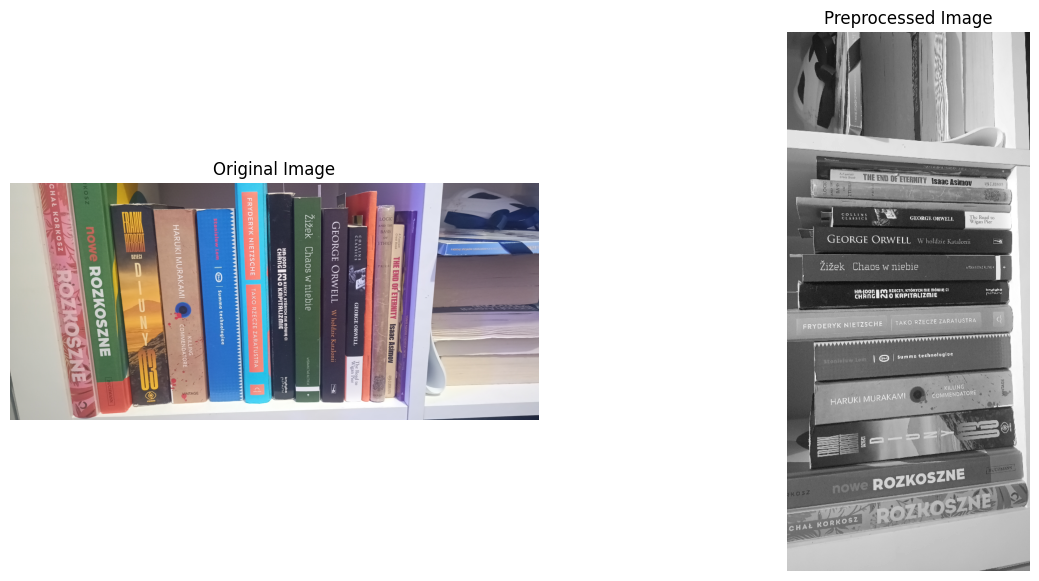

In [24]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os

# Function to preprocess the image
def preprocess_image(image_path: str):
    # Read the image
    img = cv2.imread(image_path)
    
    # Resize the image
    max_dimension = 1000
    height, width = img.shape[:2]
    if max(height, width) > max_dimension:
        scale = max_dimension / max(height, width)
        img = cv2.resize(img, None, fx=scale, fy=scale)
    
    # Rotate the image 90 degrees to the left
    img = cv2.rotate(img, cv2.ROTATE_90_COUNTERCLOCKWISE)
    
    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # Apply thresholding
    #_, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    
    return gray

# Load and preprocess an example image
image_path = os.path.join('data', 'my_shelf.jpg')  # Replace with your actual image filename
preprocessed_image = preprocess_image(image_path)

# Display the original and preprocessed images
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))
ax1.imshow(cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB))
ax1.set_title('Original Image')
ax1.axis('off')
ax2.imshow(preprocessed_image, cmap='gray')
ax2.set_title('Preprocessed Image')
ax2.axis('off')
plt.show()

In [25]:
import cv2
import pytesseract

pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

# Load image and preprocess (e.g., resize, grayscale)
image = preprocessed_image
#gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# Apply some preprocessing if necessary
#processed_image = cv2.threshold(preprocessed_image, 150, 255, cv2.THRESH_BINARY)[1]

# Extract text
text = pytesseract.image_to_string(preprocessed_image)

print(text)

Chaos w niebie

umoon yea pe deere

Ado KAPITALIZMIE




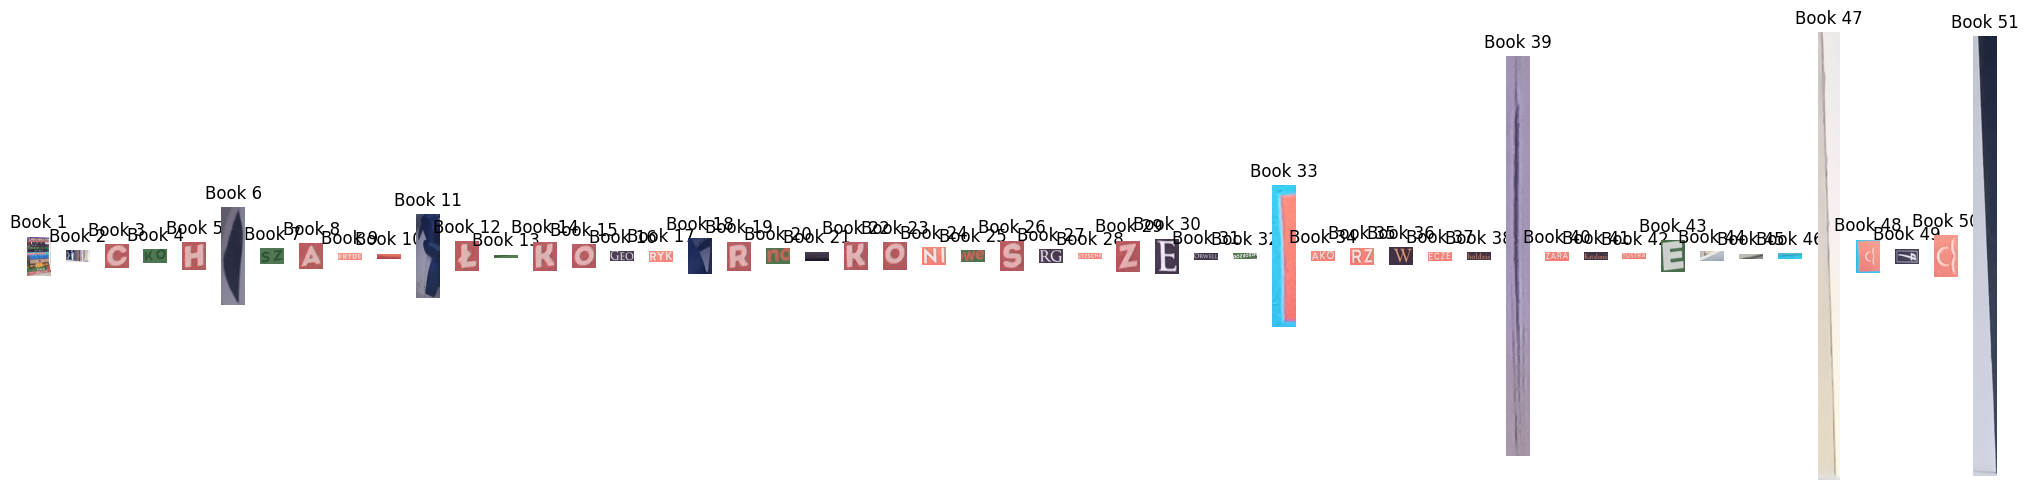

In [27]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def segment_books(image_path):
    # Read the image
    img = cv2.imread(image_path)
    img = cv2.rotate(img, cv2.ROTATE_90_COUNTERCLOCKWISE)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # Apply edge detection
    edges = cv2.Canny(gray, 50, 150, apertureSize=3)
    
    # Apply dilation to connect edges
    kernel = np.ones((5,5), np.uint8)
    dilated = cv2.dilate(edges, kernel, iterations=2)
    
    # Find contours
    contours, _ = cv2.findContours(dilated, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # Filter contours based on area
    min_area = 1000  # Adjust this value based on your image size
    book_contours = [cnt for cnt in contours if cv2.contourArea(cnt) > min_area]
    
    # Sort contours from left to right
    book_contours = sorted(book_contours, key=lambda c: cv2.boundingRect(c)[0])
    
    # Crop and save individual book images
    book_images = []
    for i, contour in enumerate(book_contours):
        x, y, w, h = cv2.boundingRect(contour)
        book_img = img[y:y+h, x:x+w]
        book_images.append(book_img)
    
    return book_images

# Use the preprocessed image from the previous cell
image_path = 'data/my_shelf.jpg'
preprocessed_image = preprocess_image(image_path)

# Segment the books
book_images = segment_books(image_path)

# Display the segmented book images
fig, axes = plt.subplots(1, len(book_images), figsize=(20, 5))
for i, book_img in enumerate(book_images):
    axes[i].imshow(cv2.cvtColor(book_img, cv2.COLOR_BGR2RGB))
    axes[i].axis('off')
    axes[i].set_title(f'Book {i+1}')

plt.tight_layout()
plt.show()